# Dfs2 - Various types

This notebook examines various Dfs2 types: 

* Horizontal
    - UTM (utm_not_rotated_neurope_temp.dfs2)
    - Long/Lat (europe_wind_long_lat.dfs2)
    - Long/Lat global (global_long_lat_pacific_view_temperature_delta.dfs2)
    - Local coordinates (M3WFM_sponge_local_coordinates.dfs2)
* Rotated 
    - UTM (BW_Ronne_Layout1998_rotated.dfs2)    
* Vertical (hd_vertical_slice.dfs2)
* Spectral
    - Linear f-axis (dir_wave_analysis_spectra.dfs2)
    - Logarithmic f-axis (pt_spectra.dfs2)

For each of these types, it's possible to :

* plot
* isel 
* sel (point, line or area)
* read and write without changing header (origo and rotation)

In [1]:
import mikeio

## Horizontal

### Horizontal, UTM (projected)

In [2]:
fn = "../tests/testdata/utm_not_rotated_neurope_temp.dfs2"
dfs = mikeio.open(fn)
da = dfs.read()[0]
da

<mikeio.DataArray>
name: Temperature
dims: (time:2, y:104, x:119)
time: 2022-03-01 00:00:00 - 2022-03-01 12:00:00 (2 records)
geometry: Grid2D (ny=104, nx=119)

In [3]:
da.geometry

<mikeio.Grid2D>
x: [-2.778e+05, -2.611e+05, ..., 1.689e+06] (nx=119, dx=1.667e+04)
y: [5.667e+06, 5.684e+06, ..., 7.384e+06] (ny=104, dy=1.667e+04)
projection: UTM-32

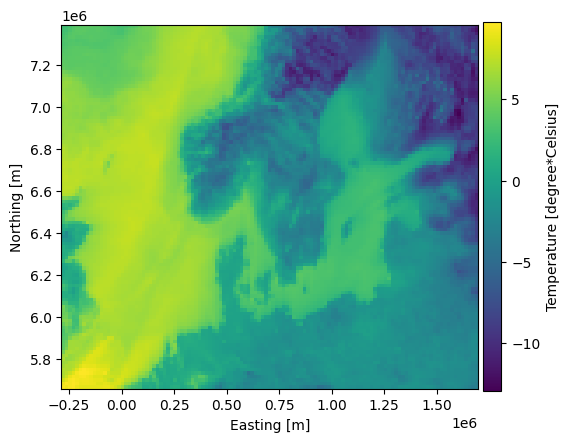

In [4]:
da.plot();

### Horizontal, geographic (long/lat)

In [5]:
fn = "../tests/testdata/europe_wind_long_lat.dfs2"
da = mikeio.read(fn)[1]
da

<mikeio.DataArray>
name: Wind x-comp (10m)
dims: (time:1, y:101, x:221)
time: 2012-01-01 00:00:00 (time-invariant)
geometry: Grid2D (ny=101, nx=221)

In [6]:
da.geometry

<mikeio.Grid2D>
x: [-15, -14.75, ..., 40] (nx=221, dx=0.25)
y: [30, 30.25, ..., 55] (ny=101, dy=0.25)
projection: LONG/LAT

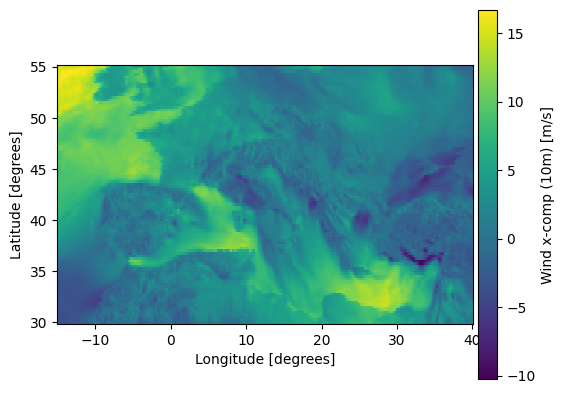

In [7]:
da.plot();

### Horizontal, geographic with global coverage

In [8]:
fn = "../tests/testdata/global_long_lat_pacific_view_temperature_delta.dfs2"
da = mikeio.read(fn)[0]
da

<mikeio.DataArray>
name: air_temperature_anomaly
dims: (time:12, y:73, x:96)
time: 2089-01-16 00:00:00 - 2089-12-16 00:00:00 (12 non-equidistant records)
geometry: Grid2D (ny=73, nx=96)

In [9]:
da.geometry

<mikeio.Grid2D>
x: [0, 3.75, ..., 356.2] (nx=96, dx=3.75)
y: [-90, -87.5, ..., 90] (ny=73, dy=2.5)
projection: LONG/LAT

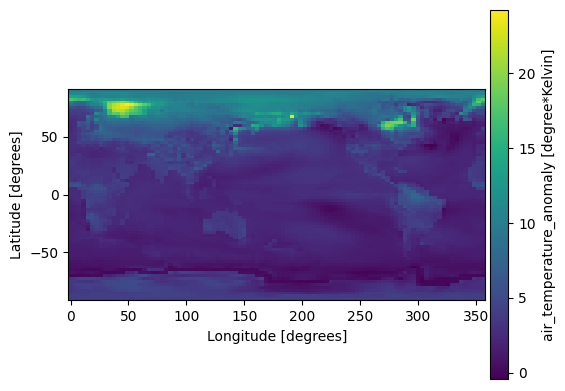

In [10]:
da.plot();

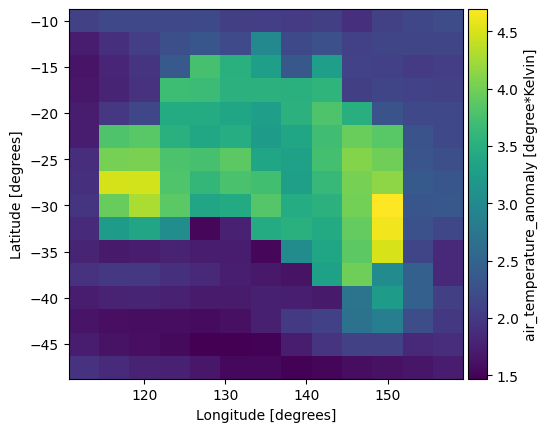

In [11]:
da.sel(area=[110,-50,160,-10]).plot();

### Local coordinates

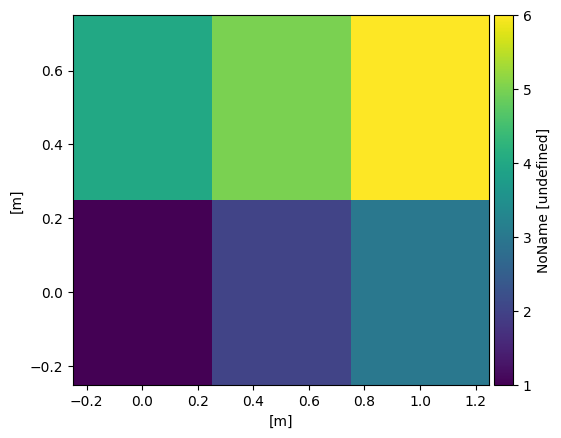

In [40]:
import numpy as np
da = mikeio.DataArray(np.array([[1,2,3],[4,5,6]]), geometry=mikeio.Grid2D(nx=3, ny=2, dx=0.5, projection="NON-UTM"))
da.plot();

In [12]:
fn = "../tests/testdata/M3WFM_sponge_local_coordinates.dfs2"
da = mikeio.read(fn)[0]
da

<mikeio.DataArray>
name: z (m)
dims: (time:1, y:62, x:362)
time: 1990-01-01 12:00:00 (time-invariant)
geometry: Grid2D (ny=62, nx=362)

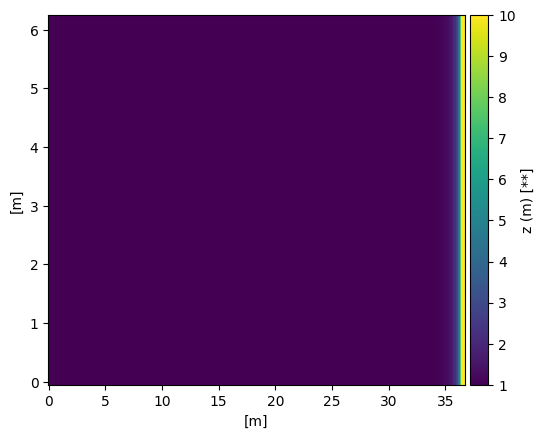

In [13]:
da.plot();

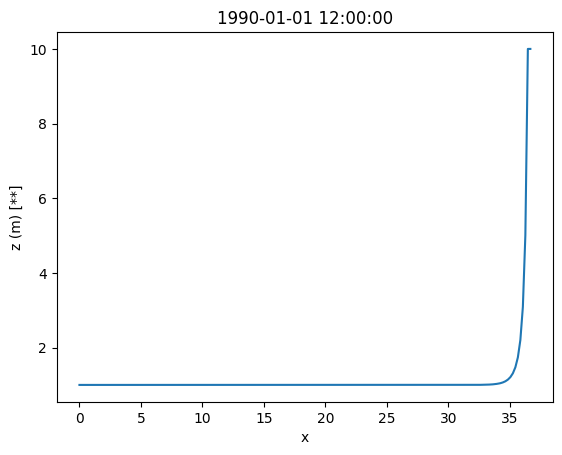

In [14]:
da.sel(y=3).plot();

## Rotated

In [15]:
fn = "../tests/testdata/BW_Ronne_Layout1998_rotated.dfs2"
da = mikeio.read(fn)[0]
da

<mikeio.DataArray>
name: Bathymetry
dims: (time:1, y:172, x:263)
time: 1990-01-01 12:00:00 (time-invariant)
geometry: Grid2D (ny=172, nx=263)

In [16]:
da.geometry

<mikeio.Grid2D>
x: [0, 5, ..., 1310] (nx=263, dx=5)
y: [0, 5, ..., 855] (ny=172, dy=5)
origin: (4.797e+05, 6.105e+06), orientation: -22.239
projection: PROJCS["UTM-33",GEOGCS["Unused",DATUM["UTM Projections",SPHEROID["WGS 1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000],PARAMETER["False_Northing",0],PARAMETER["Central_Meridian",15],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0],UNIT["Meter",1]]

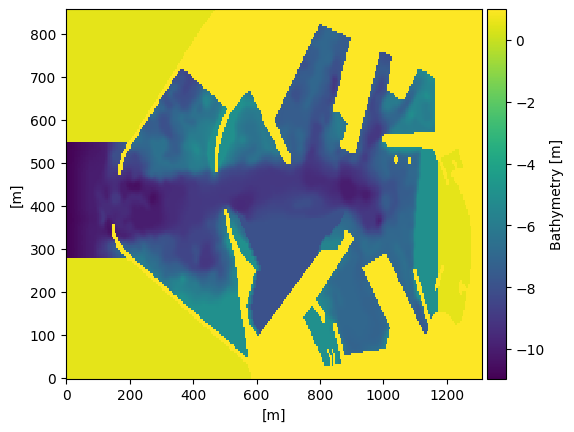

In [17]:
da.plot();

## Vertical

In [18]:
fn = "../tests/testdata/hd_vertical_slice.dfs2"
da = mikeio.open(fn, type="vertical").read()[0]
da

<mikeio.DataArray>
name: U velocity
dims: (time:13, y:76, x:41)
time: 2022-04-23 00:00:00 - 2022-04-23 12:00:00 (13 records)
geometry: Grid2D (ny=76, nx=41)

In [19]:
da.geometry

<mikeio.Grid2D>
x: [0, 0.0193, ..., 0.7722] (nx=41, dx=0.0193)
y: [0, 1, ..., 75] (ny=76, dy=1)
projection: NON-UTM

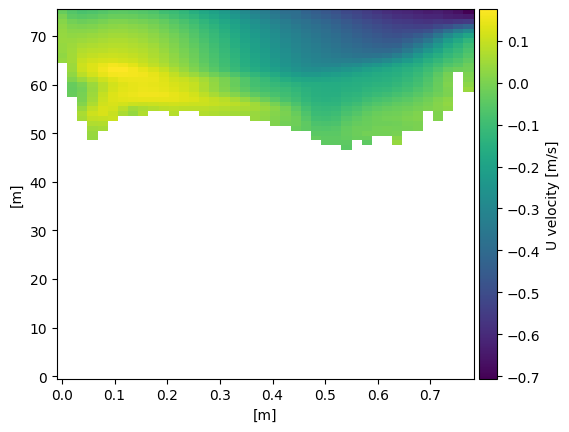

In [20]:
da.plot();

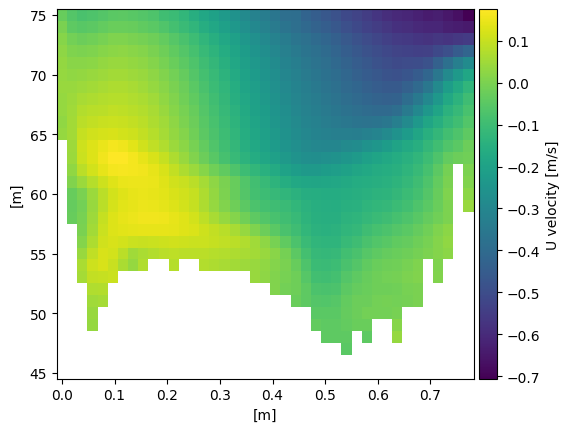

In [21]:
da.isel(y=slice(45,None)).plot();

## Spectral

When reading spectral dfs2 files, the user must specify type='spectral'. 

### Linear f-axis 

In [22]:
fn = "../tests/testdata/dir_wave_analysis_spectra.dfs2"
dfs = mikeio.open(fn, type="spectral")
da = dfs.read()[0]
da

<mikeio.DataArray>
name: Directional spectrum [1]
dims: (time:1, y:37, x:128)
time: 1970-01-01 00:00:00 (time-invariant)
geometry: Grid2D (ny=37, nx=128)

In [23]:
da.geometry

<mikeio.Grid2D> (spectral)
x: [0.003906, 0.007812, ..., 0.5] (nx=128, dx=0.003906)
y: [0, 10, ..., 360] (ny=37, dy=10)
projection: NON-UTM

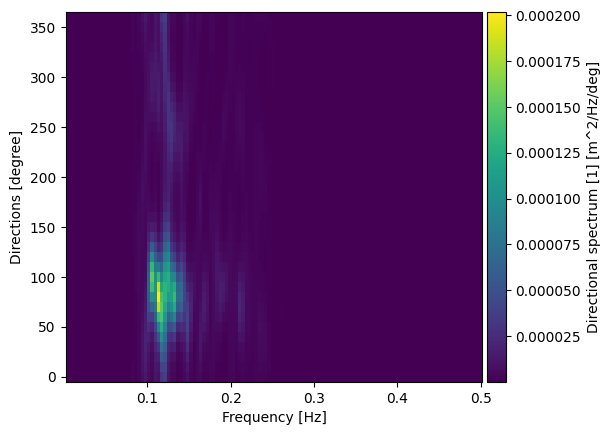

In [24]:
da.plot();

### Logarithmic f-axis

In [25]:
fn = "../tests/testdata/pt_spectra.dfs2"
dfs = mikeio.open(fn, type="spectral")
da = dfs.read()[0]
da

<mikeio.DataArray>
name: Point 1: Energy density
dims: (time:31, y:16, x:25)
time: 2017-10-27 00:00:00 - 2017-10-27 05:00:00 (31 records)
geometry: Grid2D (ny=16, nx=25)

In [26]:
da.geometry.is_spectral

True

In [27]:
da.geometry.x   # logarithmic frequency axis

array([0.055     , 0.0605    , 0.06655   , 0.073205  , 0.08052551,
       0.08857806, 0.09743587, 0.10717946, 0.1178974 , 0.12968715,
       0.14265587, 0.15692146, 0.1726136 , 0.18987497, 0.20886247,
       0.22974872, 0.2527236 , 0.27799597, 0.30579557, 0.33637513,
       0.37001266, 0.40701393, 0.44771533, 0.49248688, 0.54173558])

In [28]:
da.geometry

<mikeio.Grid2D> (spectral)
x: [0.055, 0.0605, ..., 0.5417] (nx=25, dx=1.1)
y: [0, 22.5, ..., 337.5] (ny=16, dy=22.5)
projection: LONG/LAT

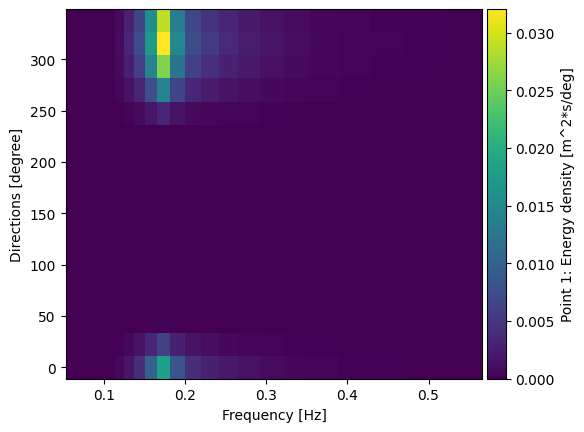

In [29]:
da.plot();

## Flow output with Bathymetry as static item

In [1]:
import mikeio

dfs = mikeio.open("../tests/testdata/flow.dfs2")
dfs

<mikeio.Dfs2>
geometry: Grid2D (ny=20, nx=13)
items:
  0:  Surface elevation <Surface Elevation> (meter)
  1:  U velocity <u velocity component> (meter per sec)
  2:  V velocity <v velocity component> (meter per sec)
  3:  Current speed <Current Speed> (meter per sec)
  4:  Current direction <Current Direction> (radian)
  5:  CFL number (HD) <Undefined> (undefined)
time: 6 steps
start time: 1993-12-02 00:00:00

-13.49011

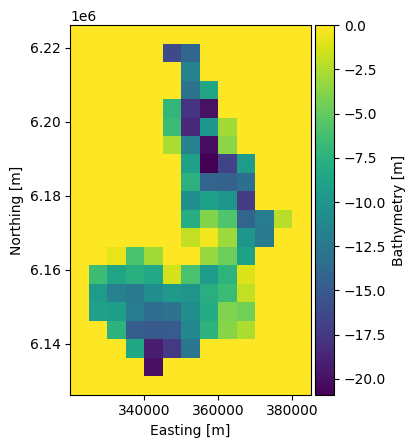

In [23]:
dfs.geometry.bathymetry.plot()
dfs.geometry.bathymetry.values[4,4]

In [5]:
dfs.geometry.bathymetry.sel(x=345000,y=6150000).values == pytest.approx(-13.49011)

-13.49011

In [27]:
dfs.geometry.bathymetry.type == EUMType.Bathymetry

NameError: name 'EUMType' is not defined